# Projeto - Auto ML para Regressão

<center><img width="70%" src="https://img.freepik.com/free-vector/data-extraction-concept-illustration_114360-4766.jpg?w=1060&t=st=1670674513~exp=1670675113~hmac=cf5151ec7480787db7b8894ece73862f0da8d52cce671e70c4aef401e9e210cf"></center>

Automação é descrito como o processo em que os mecanismos realizam seu próprio funcionamento. Assim, o equipamento/máquina consegue realizar sua atividade sem a necessidade de interferência humana. O processo usado nas fábricas é assim fazendo uma produção rápida e em longa escala.

Com o aumento tecnológico, e o avanço na indústria 4.0, a automação se tornou comum em várias áreas. Hoje, é encontrado serviços que foram substituídos por conta disto. Exemplos: caixas de supermercado em que o equipamento é responsável por registrar as compras e cobrar dos clientes; lanchonetes que se utilizam também de atendentes configurados para realizar os pedidos; cobradores de ônibus e etc…

Porém, ainda sim há a necessidade de uma mão humana por trás desses processos seja para criá-los, aplicá-los e na manutenção. A área de Machine Learning não ficou de fora da automação. As bibliotecas de Auto ML são responsáveis por tratar os dados, testar os modelos e aplicar os modelos sem a necessidade do Cientista de Dados ter que avaliar e digitar códigos para cada etapa. Mas ainda assim, como todos os equipamentos automáticos, o ser humano precisa ter um papel atrás das cortinas. A avaliação das métricas e a aplicação do Auto ML ainda é necessário ter um Cientista de Dados que tome uma decisão, interprete os dados e apresenta ao público alvo. 

O projeto aqui proposto tem o objetivo de mostrar a aplicação de um pacote AutoML, Pytcaret, para um problema de regressão. 

## 1. Apresentando o problema

<center><img width="70%" src="https://img.freepik.com/fotos-gratis/variedade-de-vista-frontal-de-elementos-de-natureza-morta-medica_23-2148854096.jpg?w=1380&t=st=1670674621~exp=1670675221~hmac=23018e2d112f9bb00ad37b662707d1bf78712e252da8dd70112e5267b1644f5d"></center>


Aqui será avaliado os dados de uma empresa de seguro saúde. Um resumo simplista dos dados apresenta que há valores de preço do seguro relacionados a algumas características dos clientes. Assim o trabalho será realizar um processo de regressão que consiga prever esses valores a partir dessas características. 
Uma regressão linear é dada por uma equação de reta que considera as variáveis usadas para determinar um valor alvo. 

Gráfico de exemplo para regressão linear. A linha azul é construída a partir dos dados (pontos em vermelho). 

Uma regressão linear simples é dada pela equação:

$F(x) = y = α + \beta x$


Na equação 1, o y é a variável prevista, alfa é o valor de intercepto - onde a linha começa quando x = 0, Beta é a inclinação da reta isto é o quão influente a variável preditora é no modelo, e x é a variável preditora. 
Para uma regressão linear múltipla, isto é, quanto o modelo tem mais do que uma variável preditora (x) é acrescentado mais variáveis na equação.

$F(x) = y = α + \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

Esse problema então seguirá as seguintes etapas:

* Importação e informação dos dados.
* Análise exploratória para se entender como cada variável se encaixa no problema. 
* Aplicação do PyCaret para AutoML. E aqui conterá as etapas de tratamento, teste dos modelos, avaliação e aplicação do melhor modelo. 


## Importando os dados

In [1]:
# warning ignores
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pycaret -q

     |████████████████████████████████| 320 kB 4.7 MB/s 
     |████████████████████████████████| 6.8 MB 47.0 MB/s 
     |████████████████████████████████| 1.3 MB 36.4 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 662 kB 51.7 MB/s 
     |████████████████████████████████| 5.0 MB 53.3 MB/s 
     |████████████████████████████████| 2.0 MB 41.8 MB/s 
     |████████████████████████████████| 16.5 MB 45.4 MB/s 
     |████████████████████████████████| 1.7 MB 42.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 325 kB 59.2 MB/s 
     |████████████████████████████████| 167 kB 78.6 MB/s 
     |████████████████████████████████| 3.3 MB 59.0 MB/s 
     |████████████████████████████████| 147 kB 58.2 MB/s 
     |████████████████████████████████| 25.8 MB 1.2 MB/s 
     |███████████████

In [3]:
# configuração pycaret e Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
# importando os daodos
DATA_PATH = "https://raw.githubusercontent.com/ptavares96/Proejto_Health_Insurance/main/insurance.csv"
df = pd.read_csv(DATA_PATH)

In [5]:
# verificando as primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Após olhar as primeiras entrandas para conferir se os dados foram importandos corretamente, é bom observar as as últmas também para verificar se não há alguma valor que represente o total de alguma variável numérica e isso influenciar na análise. 

In [6]:
# verificando as últimas entradas
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Informação dos dados

In [7]:
def info_dados(df):    
    print('Número de entradas (linhas): ', df.shape[0])
    print('\nNúmero de variáveis (colunas): ', df.shape[1])
    print("\nDados ausentes (total):\t{}\n".format(df.isnull().sum().max()))
    print("\nNomes das features:\n{}\n".format(df.columns.values))
    print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))
    print("Tipos de Variáveis (por coluna)\n{}".format(df.dtypes))
    for column in df.columns[1:]:
        print(f'\nColuna {column}: {df[column].unique()}')

In [ ]:
info_dados(df)

Número de entradas (linhas):  1338

Número de variáveis (colunas):  7

Dados ausentes (total):	0


Nomes das features:
['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Valores únicos (por coluna):
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Tipos de Variáveis (por coluna)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Coluna sex: ['female' 'male']

Coluna bmi: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.6

O mostrado que o dataset contém 1338 entradas (linhas) e 7 variáveis (colunas). Não há nesses dados dados ausentes. Construi-se agora um dicionário das variáveis.

**Dicionário das variáveis:**


3 variáveis categóricas:

* Sex: gênero das pessoas. (Male ou Female)
* Smoker: se o indivíduo fuma (Yes ou No)
* Region: região onde a pessoa reside ('southwest' 'southeast' 'northwest' 'northeast').

4 Variáveis númericas:

* Age: idade das pessoas. 
* BMI: Indice de massa corporal. 
* Children: quantos filhos cada individuo tem.
* Charges: valor cobrado pelo seguro saúde

A variável Charges é a variável alvo. 











**Descrição das variáveis numéricas**

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* É visto que a média de idades que compõe os dados é de 39 anos. As idades variam de 18 anos até 64 anos.
* A média do Indice Corporal Médio das pessoas é de 30,66 com valor mínimo de 15.96 e máximo de 53.13. Possui mediana de 30.4. 
* A quantidade de filhos por pessoa varia de nenhum (0) até 5 filhos. 
* A média de cobrança dos seguro saude dé de $13270,42. 

## Análise exploratóra

### Análise exploratória variáveis categóricas

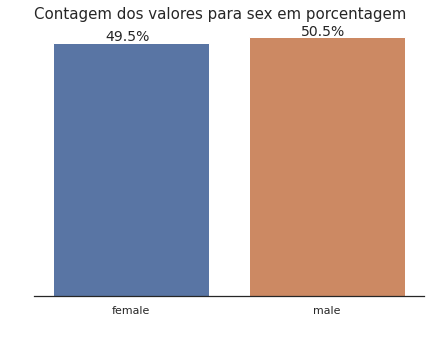

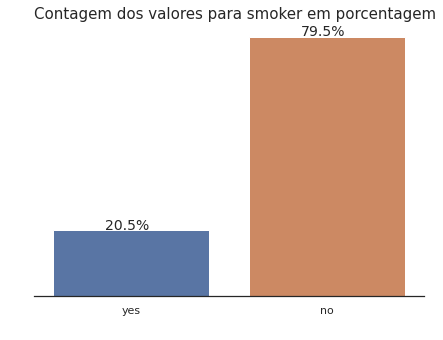

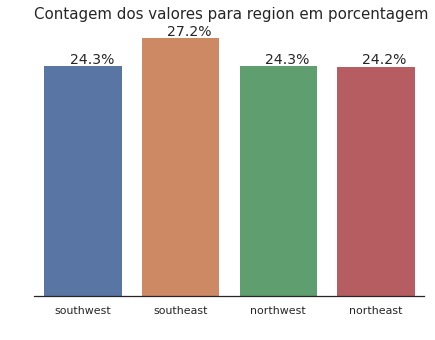

In [29]:
sns.set_theme(style="white")

def contagem(feature, data=df):
    fig, ax = plt.subplots(figsize=(7,5))

    def bar_percentage(plot, feature):
        total = len(feature)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 3 
            y = p.get_y() + p.get_height() * 1.01
            ax.annotate(percentage, (x,y), size = 14)
        plt.show()

    ax = sns.countplot(x=df[feature], data=df)
    ax.set_title(f'Contagem dos valores para {feature} em porcentagem', fontsize = 15, loc = 'left')

    ax.set_yticklabels([])
    ax.set_ylabel(" ")
    ax.set_xlabel(" ")
    # ax.legend(loc='upper right', bbox_to_anchor = (1.2,1))
    sns.despine(left=True)    

    return bar_percentage(ax, df[feature])


contagem('sex')
contagem('smoker')
contagem('region')

* Os dados entre homens e mulheres estão bem balanceados. 
* Aproximadamente 80% dos clientes são não fumantes. 
* A região sudeste é a região que mais possui clientes.

Observemos a contagem das variáveis fumantes e regiões dividias pelo sexo dos clientes.

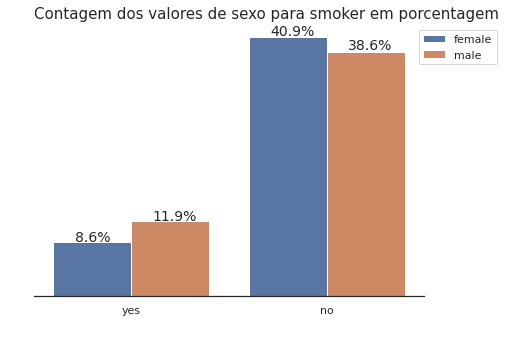

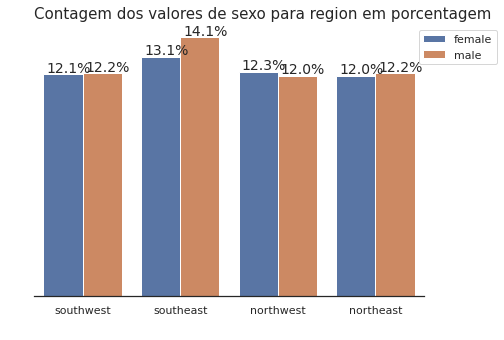

In [28]:
sns.set_theme(style="white")

def contagem_sex(feature, data=df):
    fig, ax = plt.subplots(figsize=(7,5))

    def bar_percentage(plot, feature):
        total = len(feature)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.5 - 0.05
            y = p.get_y() + p.get_height() * 1.01
            ax.annotate(percentage, (x,y), size = 14)
        plt.show()

    ax = sns.countplot(x=df[feature], data=df, hue = df.sex)
    ax.set_title(f'Contagem dos valores de sexo para {feature} em porcentagem', fontsize = 15, loc = 'left')

    ax.set_yticklabels([])
    ax.set_ylabel(" ")
    ax.set_xlabel(" ")
    ax.legend(loc='upper right', bbox_to_anchor = (1.2,1))
    sns.despine(left=True)    

    return bar_percentage(ax, df.sex)

contagem_sex('smoker')


sns.set_theme(style="white")

def contagem_sex(feature, data=df):
    fig, ax = plt.subplots(figsize=(7,5))

    def bar_percentage(plot, feature):
        total = len(feature)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 5 - 0.05
            y = p.get_y() + p.get_height() * 1.01
            ax.annotate(percentage, (x,y), size = 14)
        plt.show()

    ax = sns.countplot(x=df[feature], data=df, hue = df.sex)
    ax.set_title(f'Contagem dos valores de sexo para {feature} em porcentagem', fontsize = 15, loc = 'left')

    ax.set_yticklabels([])
    ax.set_ylabel(" ")
    ax.set_xlabel(" ")
    ax.legend(loc='upper right', bbox_to_anchor = (1.2,1))
    sns.despine(left=True)    

    return bar_percentage(ax, df.sex)

contagem_sex('region')

* É apresentado uma quantidade maior de homens fumantes.
* Apenas na população do sudeste há uma diferença maior na quantidade de homens que mulheres. 

Verifica-se a baixo a relação de fumantes por região.

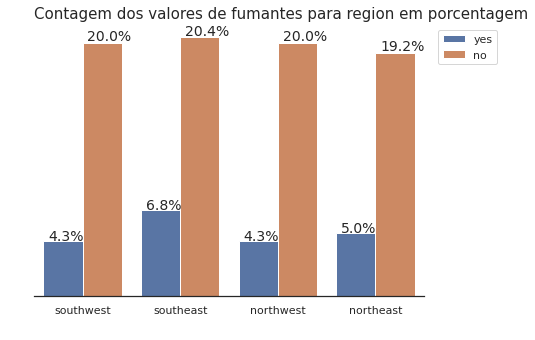

In [26]:
sns.set_theme(style="white")

def contagem_smoker(feature, data=df):
    fig, ax = plt.subplots(figsize=(7,5))

    def bar_percentage(plot, feature):
        total = len(feature)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 4 - 0.05
            y = p.get_y() + p.get_height() * 1.01
            ax.annotate(percentage, (x,y), size = 14)
        plt.show()

    ax = sns.countplot(x=df[feature], data=df, hue = df.smoker)
    ax.set_title(f'Contagem dos valores de fumantes para {feature} em porcentagem', fontsize = 15, loc = 'left')

    ax.set_yticklabels([])
    ax.set_ylabel(" ")
    ax.set_xlabel(" ")
    ax.legend(loc='upper right', bbox_to_anchor = (1.2,1))
    sns.despine(left=True)    

    return bar_percentage(ax, df.smoker)

contagem_smoker('region')

* É visto que a região sudeste, tembém a mais populosa desses dados, possui o maior número de fumantes.

**Variáveis categóricas em relação a variável alvo (charges)**

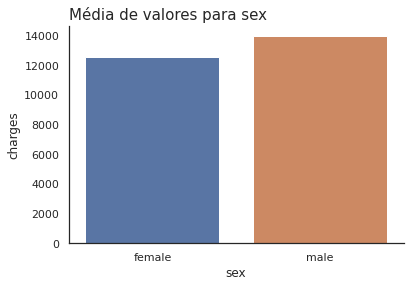

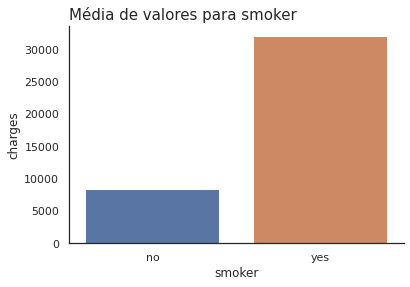

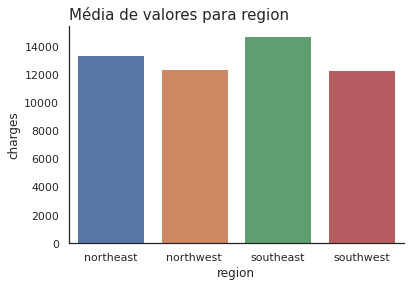

In [21]:
def per_charges(feature):
  mean_price = df[[feature, 'charges']].groupby(feature, as_index=False).mean()

  ax = sns.barplot(mean_price[feature], mean_price['charges'])
  ax.set_title(f'Média de valores para {feature}', fontsize = 15, loc = 'left')
  sns.despine()

  return plt.show()


per_charges('sex')
per_charges('smoker')
per_charges('region')

* Em média homens pagam a mais que mulheres. 
* Fumantes possuem um valor médio de pagamento maior que os não fumantes. 
* Em média os residentes da região sudeste é pagam mais. 

### Análise exploratória variáveis categóricas


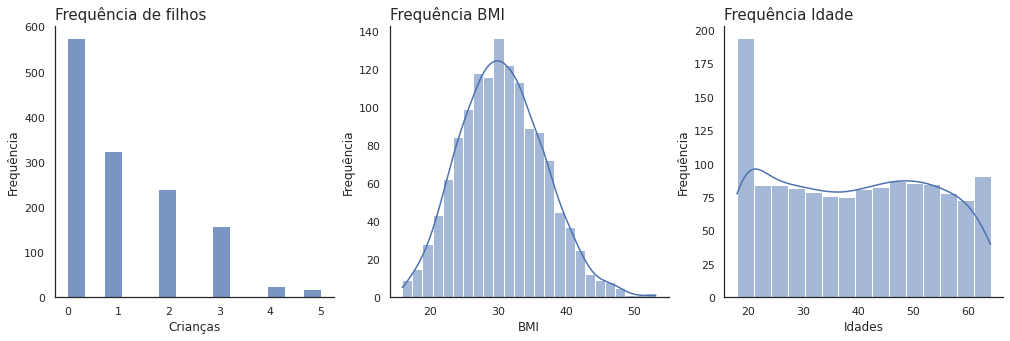

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# childrens
sns.histplot(ax = axes[0], data=df, x='children')
axes[0].set_title('Frequência de filhos', fontsize = 15, loc = 'left')
axes[0].set_ylabel("Frequência")
axes[0].set_xlabel("Crianças")

#BMI

sns.histplot(ax = axes[1],data=df, x='bmi', kde=True)
axes[1].set_title('Frequência BMI', fontsize = 15, loc = 'left')
axes[1].set_ylabel("Frequência")
axes[1].set_xlabel("BMI")

#Age

sns.histplot(ax = axes[2], data=df, x='age', kde=True, bins = 15)
axes[2].set_title('Frequência Idade', fontsize = 15, loc = 'left')
axes[2].set_ylabel("Frequência")
axes[2].set_xlabel("Idades")
sns.despine()

* São mais frequentes clientes que não possuem filhos. 
* A distribuição de BMI é um distribuição normal. 
* Há mais pessoas na faixa dos 20 anos que contratam o seguro. 

**Variáveis numéricas em relação a variável alvo (charges)**

Text(0.5, 0, 'Idades')

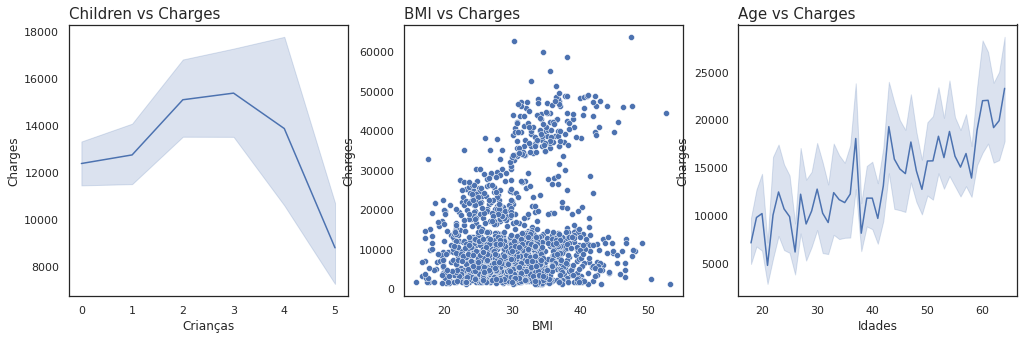

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

sns.lineplot(ax=axes[0], data = df, x = 'children', y='charges')
axes[0].set_title('Children vs Charges', fontsize = 15, loc = 'left')
axes[0].set_ylabel("Charges")
axes[0].set_xlabel("Crianças")

sns.scatterplot(ax=axes[1], data = df, x = 'bmi', y='charges')
axes[1].set_title('BMI vs Charges', fontsize = 15, loc = 'left')
axes[1].set_ylabel("Charges")
axes[1].set_xlabel("BMI")

sns.lineplot(ax=axes[2], data = df, x = 'age', y='charges')
axes[2].set_title('Age vs Charges', fontsize = 15, loc = 'left')
axes[2].set_ylabel("Charges")
axes[2].set_xlabel("Idades")

* O valor é mais alto para os clientes que possuem entre 2 e 3 crianças. 
* Há um agrupamento dos valores de 10000 para BMI. 
* É visto que o valor da cobrança aumenta com a idade dos clientes.

## Auto ML - Pycaret

Primeiro, será realizado a separação dos dados entre treino e teste. 

In [55]:
# separando os dados de treino e teste
test = df.sample(frac=0.15)
train = df.drop(test.index)

test.reset_index(inplace = True, drop = True)
train.reset_index(inplace = True, drop = True)


In [56]:
print(train.shape)
print(test.shape)

(1137, 7)
(201, 7)


### Configurando PyCaret

In [59]:
# import os pacotes
from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, load_model

In [62]:
# criando o setup do Pycaret
reg = setup(data=train , target='charges', normalize= True, log_experiment = True, experiment_name = 'charge_01')

,Description,Value
0,session_id,554
1,Target,charges
2,Original Data,"(1137, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(795, 14)"


INFO:logs:Logging experiment in MLFlow
2022/12/17 13:19:32 INFO mlflow.tracking.fluent: Experiment with name 'charge_01' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('P_tr

In [63]:
# melhor modelo
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2789.1603,2.442390e+07,4854.4494,0.8391,0.4511,0.3255,0.083
rf,Random Forest Regressor,2791.5214,2.572573e+07,5009.5797,0.8301,0.4673,0.3281,0.918
lightgbm,Light Gradient Boosting Machine,3097.5330,2.623866e+07,5061.7327,0.8262,0.5511,0.3819,0.122
et,Extra Trees Regressor,2920.3433,2.985218e+07,5401.8130,0.8028,0.4984,0.3445,0.393
ada,AdaBoost Regressor,4340.3671,3.054582e+07,5510.0599,0.8013,0.6332,0.7314,0.032
llar,Lasso Least Angle Regression,4440.4822,4.069676e+07,6350.4478,0.7323,0.5899,0.4508,0.015
ridge,Ridge Regression,4458.6654,4.073207e+07,6352.7294,0.7321,0.5893,0.4531,0.011
br,Bayesian Ridge,4456.1999,4.073833e+07,6353.2284,0.7321,0.5896,0.4526,0.015
lasso,Lasso Regression,4444.6948,4.073747e+07,6353.3128,0.7319,0.5927,0.4507,0.019
lr,Linear Regression,4446.1042,4.075431e+07,6354.6047,0.7318,0.5944,0.4507,0.330


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [64]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Apartir da aplicação do PyCaret é visto que o melhor modelo é o de GradientBoostingRegresso. Os próximos passos agora serão para selecionar os hiperparâmetros com base em melhorar o valor de R2. 

### Instanciando o modelo e selecionando os hiperparâmetros

In [65]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2632.5392,2.128813e+07,4613.9063,0.8938,0.4038,0.3001
1,2560.9998,1.951805e+07,4417.9236,0.8525,0.4030,0.2792
2,2740.5702,2.890344e+07,5376.1922,0.8635,0.4243,0.3368
3,2982.0987,2.896136e+07,5381.5759,0.8211,0.5550,0.4624
4,3295.3829,3.354555e+07,5791.8525,0.6879,0.4227,0.3123
5,2889.6104,1.998381e+07,4470.3259,0.8831,0.4210,0.3778
6,3556.1405,3.663891e+07,6053.0083,0.7562,0.5779,0.3819
7,2004.6165,8.992568e+06,2998.7611,0.9409,0.3493,0.2741
8,3140.7071,3.226246e+07,5680.0055,0.7860,0.6051,0.2835


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [66]:
tuned_gbr = tune_model(gbr, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3289.1059,2.817889e+07,5308.3790,0.8594,0.4622,0.3685
1,3047.0785,2.780254e+07,5272.8112,0.7899,0.4805,0.3158
2,3271.4549,3.422416e+07,5850.1420,0.8383,0.5143,0.4360
3,4088.6675,4.132537e+07,6428.4815,0.7447,0.7226,0.6196
4,4015.8653,3.831316e+07,6189.7622,0.6436,0.4956,0.4089
5,3361.5628,2.489161e+07,4989.1495,0.8543,0.6238,0.5125
6,4199.6383,4.359056e+07,6602.3147,0.7100,0.6099,0.4075
7,3167.1139,1.861256e+07,4314.2278,0.8778,0.4270,0.4064
8,3869.0720,3.851138e+07,6205.7534,0.7445,0.6446,0.4219


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.005, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [67]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.005, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


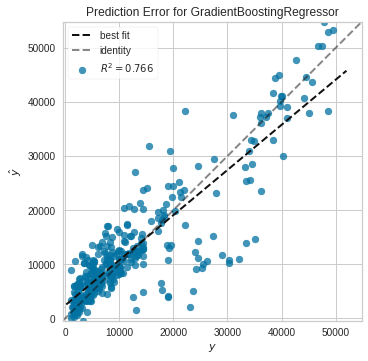

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [68]:
# plot do modelo
plot_model(tuned_gbr, plot='error')

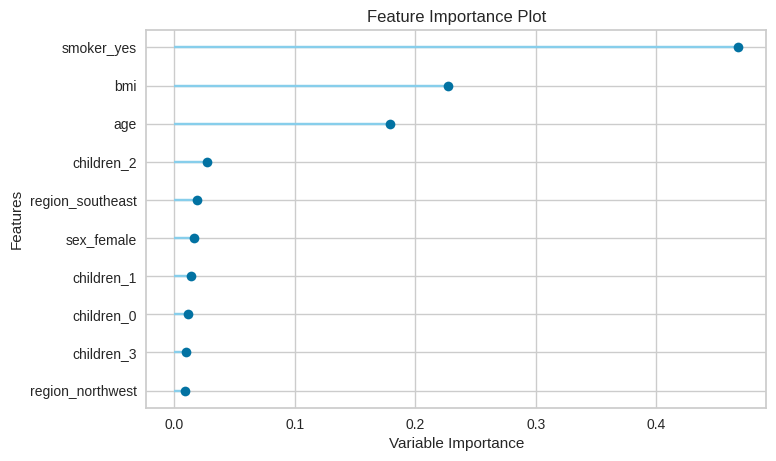

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [69]:
# feature importances
plot_model(tuned_gbr, plot='feature')

Após instanciado o modelo e a seleção dos hiperparâmetros é visto a imporntância das variáveis nessas etapas. 

É visto que a variável de maior importância para o modelo de regressão é smoke_yes, isto é, se o cliente fuma é um informação importante para o valor cobrado pelo seguro. 

### Fazendo previsões com o modelo

In [70]:
predict_model(tuned_gbr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.005, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3682.7735,3.154390e+07,5616.396,0.7663,0.5814,0.4707


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,1.403355,-0.852471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12124.992188,11003.273432
1,0.039459,-1.786975,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,17179.521484,19641.381849
2,-1.468005,0.706137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34828.652344,32846.170703
3,0.972651,-0.962267,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10942.131836,14331.490212
4,0.900867,1.118904,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9634.538086,7955.811243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1.618707,-0.928420,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13451.122070,12196.775523
338,0.829083,0.276859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9964.059570,8242.637414
339,1.116219,-0.152418,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11881.358398,20756.471848
340,-1.180869,0.319787,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1824.285400,1920.877166


In [72]:
final_gbr = finalize_model(tuned_gbr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.005, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, lea

In [73]:
predict_model(final_gbr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.005, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2165.8057,1.234704e+07,3513.8351,0.9085,0.358,0.276


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,1.403355,-0.852471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12124.992188,11624.376116
1,0.039459,-1.786975,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,17179.521484,22265.758623
2,-1.468005,0.706137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34828.652344,38375.301721
3,0.972651,-0.962267,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10942.131836,12300.623262
4,0.900867,1.118904,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9634.538086,10872.261710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1.618707,-0.928420,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13451.122070,13454.588378
338,0.829083,0.276859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9964.059570,9377.794642
339,1.116219,-0.152418,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11881.358398,14995.693187
340,-1.180869,0.319787,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1824.285400,2460.548048


Aqui é visto que após a finalização do modelo e uma previsão realizada, ainda nos dados de treino o valor de R2 foi para 0.90. Agora vemos como o modelo se sai em dados não visto. 

### Previsão com o modelo de teste

In [74]:
unseen_predictions = predict_model(final_gbr, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.005, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=554, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2604.4513,1.744257e+07,4176.4298,0.8469,0.4855,0.3353


In [75]:
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,48,male,37.290,2,no,southeast,8978.18510,10243.301108
1,20,male,40.470,0,no,northeast,1984.45330,2763.064836
2,53,female,28.100,3,no,southwest,11741.72600,13418.500643
3,37,female,30.780,0,yes,northeast,37270.15120,35461.919739
4,19,female,25.745,1,no,northwest,2710.82855,2439.045438


É visto que o valor de R2 diminui mas que continuou acima de 0.80. 

# Conclusão



Este projeto tinha como objetivo principal a aplicação de um modelo de Machine Learning escolhido por AutoML. Para isso foi utilizada a biblioteca PyCaret. O problema utilizado foi um problema de regressão para dados de valores de cobrança de um seguro saúde. 

A partir das análise exploratória foi visto que pessoas que fumam pagam um valor mais alto pelo seguro. Essa informação se torna relevante quando visto que a variável ¨fumantes sim¨ possui a maior importância para definição do modelo. 

O modelo usado foi o de GradienteBoosterRegression e deu como resultado um valor de R2 de 0.84 para uma previsão realziada nos dados de testes. 

A automação de modelos de Machine Learning é uma ótima ferramente para um análise rápida, podendo realizar várias testes durante, pricipalmente em escolhas de métricas para os modelos e seus tuning. 